Import important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

Load data

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

Explore data

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.isnull().sum()/891*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


There are 38% supervived

Clean data

In [ ]:
df_train=df_train.set_index('PassengerId')
df_test=df_test.set_index('PassengerId')

In [ ]:
df_train.drop(columns=['Cabin','Ticket','Name'],inplace=True)

In [ ]:
df_test.drop(columns=['Cabin','Ticket','Name'],inplace=True)

Data Analysis

In [ ]:
sunset_bliss = sns.color_palette([ "#FF6F61", "#DE3163","#FFAD60", "#6B5B95", "#88B04B", "#92A8D1"])

In [ ]:
survive_cnt=df_train.Survived.value_counts()
survive_cnt

,count
Survived,
0,549
1,342


In [ ]:
sex_cnt=df_train.Sex.value_counts()
sex_cnt

,count
Sex,
male,577
female,314


<ipython-input-17-da8f6f597076>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=df_train['Survived'],hue=df_train['Sex'],palette=sunset_bliss,ax=ax)


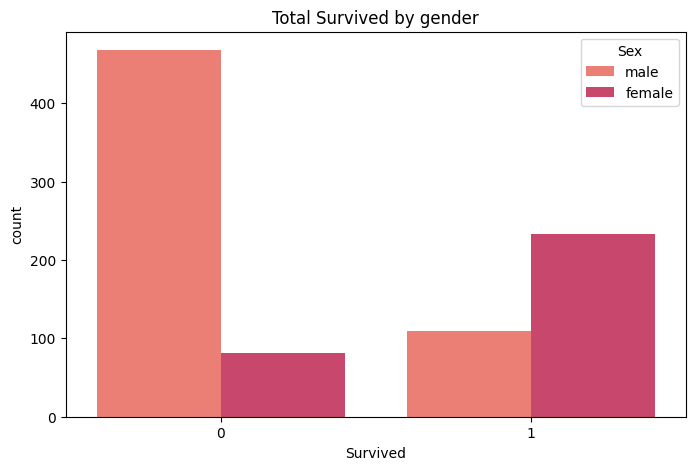

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(x=df_train['Survived'],hue=df_train['Sex'],palette=sunset_bliss,ax=ax)
plt.title('Total Survived by gender')
plt.show()

<ipython-input-18-e908f8263674>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Pclass',data=df_train,hue='Survived',palette=sunset_bliss,ax=ax)


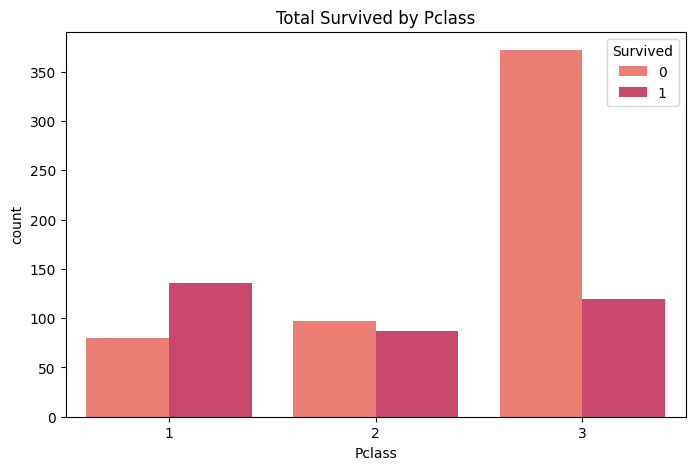

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(x='Pclass',data=df_train,hue='Survived',palette=sunset_bliss,ax=ax)
plt.title('Total Survived by Pclass')
plt.show()

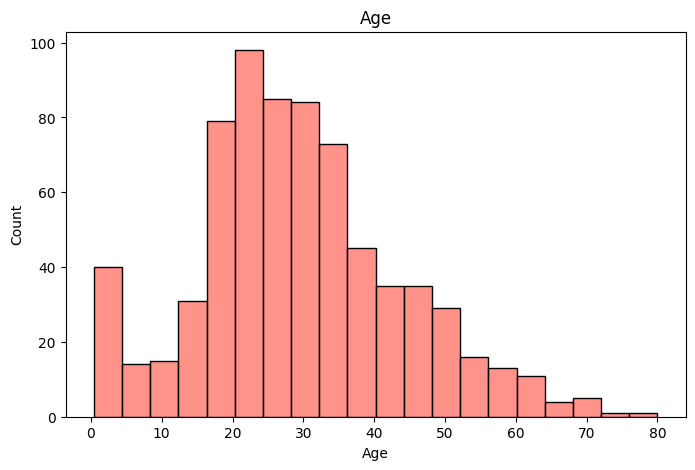

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.histplot(x='Age',data=df_train,color="#FF6F61")
plt.title("Age")
plt.show()

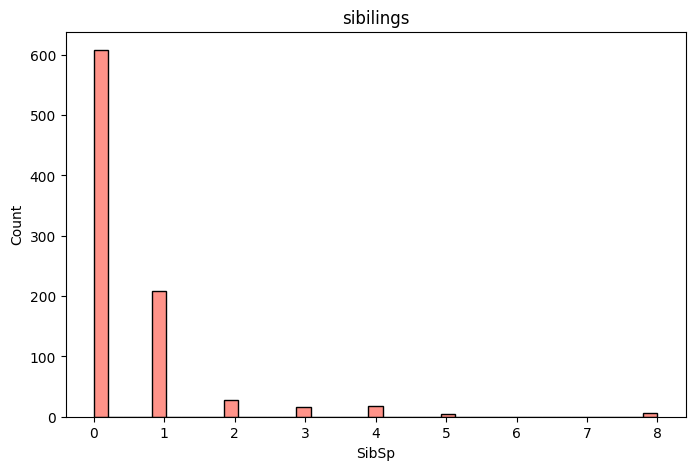

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.histplot(x='SibSp',data=df_train,color="#FF6F61")
plt.title("sibilings")
plt.show()

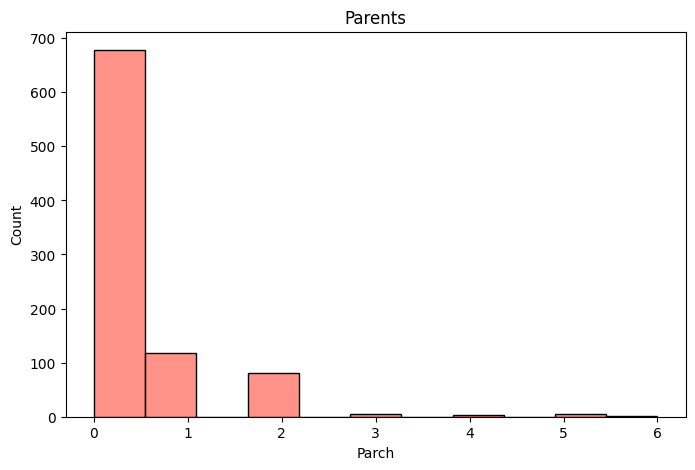

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.histplot(x='Parch',data=df_train,color="#FF6F61")
plt.title("Parents")
plt.show()

Preprocessing

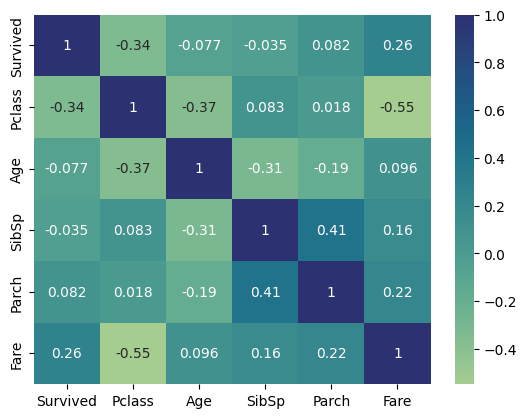

In [ ]:
x = df_train.corr(numeric_only=True)
sns.heatmap(x, annot=True, cmap='crest')
plt.show()

In [ ]:
num_pip=Pipeline([('impute',SimpleImputer(strategy='median')),
                 ('standardize',StandardScaler())])

In [ ]:
cat_pip=Pipeline([('impute',SimpleImputer(strategy='most_frequent'))
                 ,('ordinal_encoder',OrdinalEncoder())
                 ,('cat_encode',OneHotEncoder(sparse_output=False))])

In [ ]:
num_col=['Age','SibSp','Parch','Fare']
cat_col=['Sex','Embarked','Pclass']

In [ ]:
preprocessing=ColumnTransformer([("num",num_pip,num_col),
                                 ("cat",cat_pip,cat_col)])

In [ ]:
df_train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,13.00,S
888,1,1,female,19.0,0,0,30.00,S
889,0,3,female,NaN,1,2,23.45,S
890,1,1,male,26.0,0,0,30.00,C
891,0,3,male,32.0,0,0,7.75,Q


In [ ]:
Y_train = df_train['Survived']
X_train = df_train.drop(columns=['Survived'])

In [ ]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(df_test)

In [ ]:
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

ML Model

In [ ]:
model_1=RandomForestClassifier(n_estimators=100,random_state=42)
model_2=SVC(gamma='auto',random_state=42)
model_3=AdaBoostClassifier(random_state=42)
model_4=SGDClassifier(random_state=42)

In [ ]:
def prediction (model):
  pred=cross_val_predict(model,X_train,Y_train,cv=3)
  return pred

In [ ]:
pred_1=prediction(model_1)
pred_1.mean()

0.367003367003367

In [ ]:
pred_2=prediction(model_2)
pred_2.mean()

0.3389450056116723

In [ ]:
pred_3=prediction(model_3)
pred_3.mean()

0.36924803591470257

In [ ]:
pred_4=prediction(model_4)
pred_4.mean()

0.3569023569023569

In [ ]:
def Scores(model):
  res=cross_val_score(model,X_train,Y_train,scoring="accuracy",cv=3)
  return res

In [ ]:
score_1=Scores(model_1)
score_1.mean()

0.7946127946127945

In [ ]:
score_2=Scores(model_2)
score_2.mean()

0.8249158249158249

In [ ]:
score_3=Scores(model_3)
score_3.mean()

0.7901234567901234

In [ ]:
score_4=Scores(model_4)
score_4.mean()

0.7643097643097643

The best model is Support vector classification SVC

In [ ]:
def display_conf(val):
    cm=confusion_matrix(Y_train,val)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

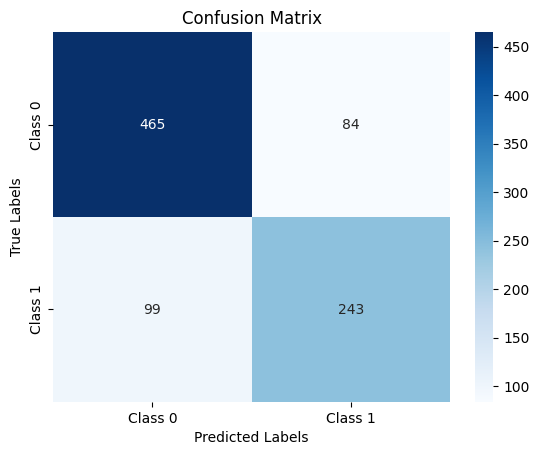

In [ ]:
display_conf(pred_1)

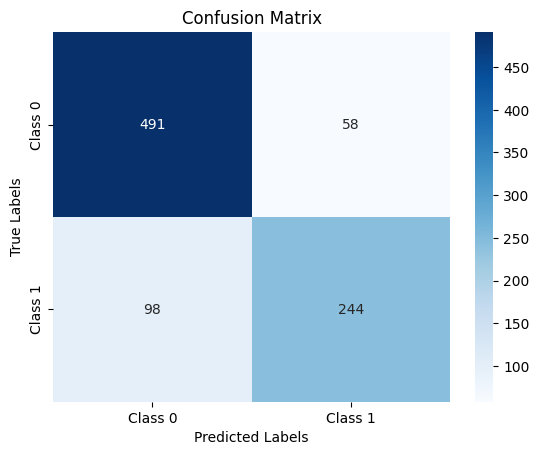

In [ ]:
display_conf(pred_2)

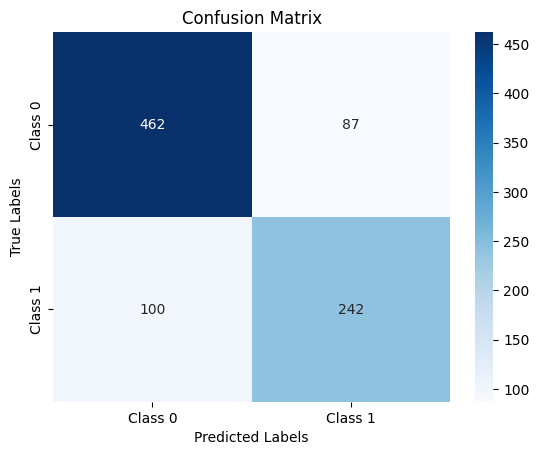

In [ ]:
display_conf(pred_3)

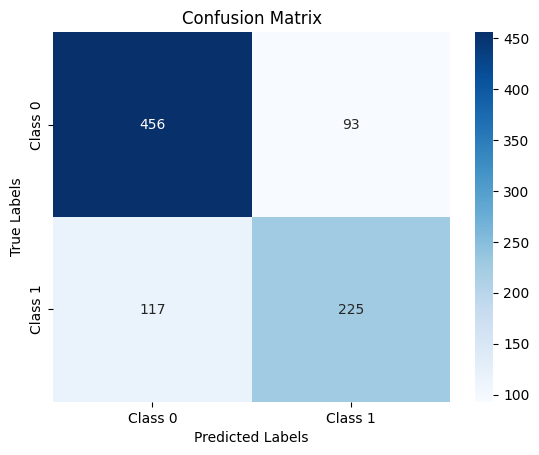

In [ ]:
display_conf(pred_4)

In [ ]:
model_2.fit(X_train,Y_train)

SVC(gamma='auto', random_state=42)

In [ ]:
model_2.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [ ]:
import joblib
#joblib.dump(model_2, 'titanic_model.pkl')

In [ ]:
from google.colab import files
#files.download('titanic_model.pkl')

In [ ]:
joblib.dump(preprocessing, 'preprocessing.pkl')

['preprocessing.pkl']

In [ ]:
files.download('preprocessing.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>